<a href="https://colab.research.google.com/github/ashishar/data_science_codes/blob/main/python/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

In [2]:
#import kaggle dataset
! pip install -q kaggle
from google.colab import files
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download mdmahmudulhasansuzan/students-adaptability-level-in-online-education

! unzip students-adaptability-level-in-online-education.zip
!ls

  0% 0.00/6.43k [00:00<?, ?B/s]
100% 6.43k/6.43k [00:00<00:00, 6.17MB/s]
Archive:  students-adaptability-level-in-online-education.zip
  inflating: students_adaptability_level_online_education.csv  
kaggle.json  students-adaptability-level-in-online-education.zip
sample_data  students_adaptability_level_online_education.csv


### **Import library**

In [5]:
from sklearn import datasets

### **Load dataset**

### **Import library**

In [6]:
import pandas as pd

### **Download CSV from GitHub**

### **Read in CSV file**

In [7]:
Student_adaptivity = pd.read_csv("students_adaptability_level_online_education.csv")
Student_adaptivity

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [21]:
print(Student_adaptivity.columns, Student_adaptivity.shape)


Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object') (1205, 14)


In [23]:
Student_adaptivity.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


### **Split dataset to X and Y variables**

In [ ]:
Y = BostonHousing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## **Data split**

### **Import library**

In [ ]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [ ]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [ ]:
X_test.shape, Y_test.shape

((102, 13), (102,))

## **Linear Regression Model**

### **Import library**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [ ]:
model = linear_model.LinearRegression()

#### Build training model

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply trained model to make prediction (on test set)

In [ ]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-1.05448557e-01  3.90976099e-02 -3.75181648e-03  1.25230500e+00
 -1.68213389e+01  4.42665009e+00 -1.07772437e-02 -1.42474808e+00
  2.63429751e-01 -1.20952181e-02 -1.00279327e+00  1.06080829e-02
 -4.05646726e-01]
Intercept: 32.291623521299314
Mean squared error (MSE): 34.10
Coefficient of determination (R^2): 0.63


### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [ ]:
r2_score(Y_test, Y_pred)

0.6278593088756383

In [ ]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

We will be using the modulo operator to format the numbers by rounding it off.

In [ ]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [ ]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [ ]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [ ]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [ ]:
Y_test

371    50.0
127    16.2
391    23.2
108    19.8
37     21.0
       ... 
307    28.2
323    18.5
372    50.0
402    12.1
88     23.6
Name: medv, Length: 102, dtype: float64

In [ ]:
import numpy as np
np.array(Y_test)

array([50. , 16.2, 23.2, 19.8, 21. , 19.4, 14.1, 28.7, 14.2, 17.5, 28.7,
        7.2, 50. , 17.6, 13.3, 17.8, 13.8, 11.3, 18.7, 32. , 21.4, 29.6,
       20.5, 13.5,  8.3, 21.7, 13.6, 21.4, 24.5, 15.2, 21. , 14.9,  8.8,
       42.3, 43.1, 26.4, 10.2, 33.2, 19.9, 28.4, 13.9, 22. , 20. , 22.2,
       21.2, 21.9, 18.5, 20.3,  9.6, 23.9, 22.6, 23.1, 30.3, 20.1, 23.3,
       20.5, 12. , 30.7, 23.1, 24.1, 18.4, 13.3, 45.4, 19.5, 12.5, 17.8,
       20.1, 50. , 17.4, 22.8,  5. , 16.5, 19. , 14.6, 19.3, 18.5, 21.8,
       16.5, 22.2, 24.5, 50. , 22.6, 19.5, 24.5, 27.5, 41.3,  7.4, 22.3,
       20.9, 30.8, 20.3, 13.9, 23.7, 23.7, 20.2, 20.6, 19. , 28.2, 18.5,
       50. , 12.1, 23.6])

In [ ]:
Y_pred

array([23.43738865, 14.99943989, 17.11303066, 22.57396394, 23.05214587,
       23.10097209, 15.40649248, 31.13969518, 17.33022417, 18.5074801 ,
       25.19010662, 10.19989614, 44.28259468, 16.03817922, 20.58067188,
       18.29010536, 13.61063892, 13.30411914, 21.12168804, 33.43527211,
       19.79540697, 25.26721157, 19.66081264, 11.99283154,  9.67848287,
       24.68885991, 13.79664361, 25.02955469, 21.06052679, 11.64006189,
       21.12429066, 14.93063841,  5.59208332, 37.6201679 , 37.6577643 ,
       22.72997696, 16.89937091, 32.80042634, 18.99460702, 28.74449991,
       13.44039637, 29.2868734 , 16.18536592, 23.56907548, 21.46457242,
       13.92788751, 13.91961503, 23.34031271, 13.97730871, 26.20698819,
       18.44252873,  8.0510729 , 33.44352883, 17.97738687, 21.64540979,
       24.00481205, 11.36170325, 32.35277753, 24.73668524, 29.19492518,
       19.72143793, 16.25632028, 39.1859917 , 20.21997766, 19.23983516,
       16.68231826, 23.94860658, 29.3499184 , 22.39354696, 28.21

#### Making the scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


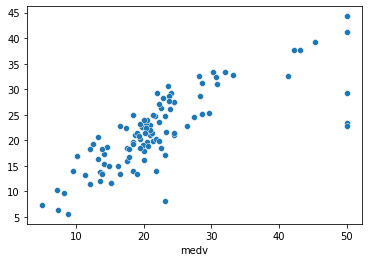

In [ ]:
sns.scatterplot(Y_test, Y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


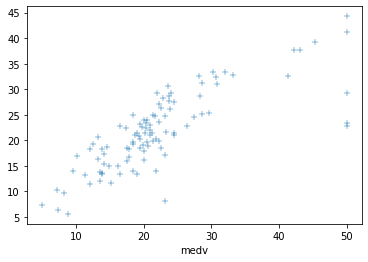

In [ ]:
sns.scatterplot(Y_test, Y_pred, marker="+")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


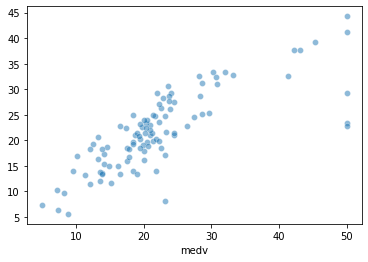

In [ ]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)